In [92]:
import pandas as pd
import numpy as np

In [109]:
#なんの分析をしているのか？
#直前の値動きの方向に次の足も賭け続けたらどうなるか？

#つまり

#上がった → 次もロング

#下がった → 次はショート

#という 最短・最弱のトレンドフォロー戦略。

In [93]:
raw = pd.read_csv(r'C:\market_data\USDJPY_M15.csv')

In [94]:
# datetime を作る
raw['datetime'] = pd.to_datetime(
    raw['<DTYYYYMMDD>'].astype(str) +
    raw['<TIME>'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

raw.set_index('datetime', inplace=True)

# CLOSEだけ取り出す（indexはdatetimeのまま）
data = raw[['<CLOSE>']].copy()
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

In [95]:
data = pd.DataFrame(raw['<CLOSE>'])
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

In [110]:
# =========================
# ② 戦略ロジック
# =========================
data['returns'] = np.log(data['price'] / data['price'].shift(1)) #価格の変化率を時系列で測定

In [113]:
# 超単純戦略（方向追従）
data['position'] = np.sign(data['returns']) #モメンタム（勢い）があるか？
data['strategy'] = data['position'].shift(1) * data['returns'] #未来を見ない工夫（超重要） →　現実的なトレード再現

<Axes: title={'center': 'Buy & Hold vs Strategy'}, xlabel='datetime'>

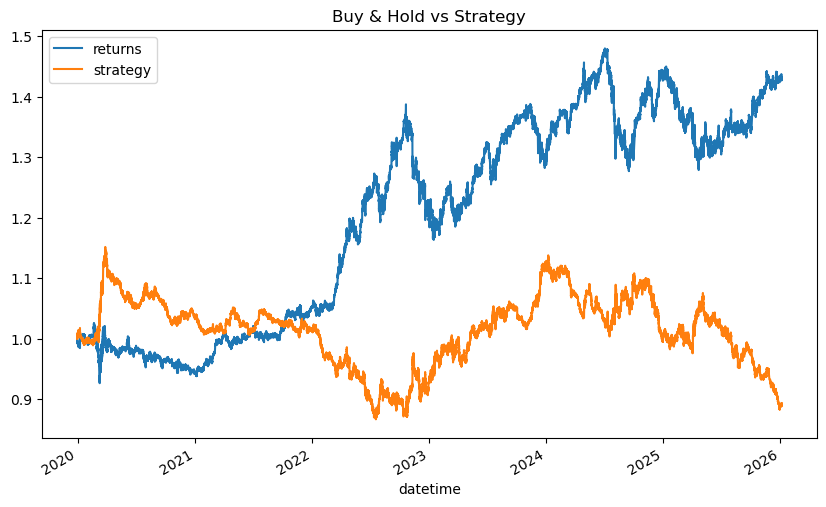

In [116]:
# =========================
# ③ 可視化
# =========================
(
    data[['returns', 'strategy']]
    .dropna()
    .cumsum()
    .apply(np.exp)      # .cumsum().apply(np.exp)      累積して指数化 →　資産曲線（エクイティカーブ)  実際に資金を運用したらどう増減するか
    .plot(figsize=(10, 6), title='Buy & Hold vs Strategy')    
)  

# 図で見ているもの returns   → 何もしない（Buy & Hold） |    strategy  → この戦略

In [118]:
#この分析で分かること
# ✔ 分かる  1,市場に 短期モメンタムがあるか    2,「方向に乗る」だけで利益になるか    3,SMA戦略を作る価値があるかどうか
#✖ 分からない  1,勝率  2,最大ドローダウン   3,実運用の耐久性

In [99]:
#P96↑完成

In [30]:
#P97↓

In [103]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [104]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: title={'center': 'Buy & Hold vs Strategy'}, xlabel='datetime'>

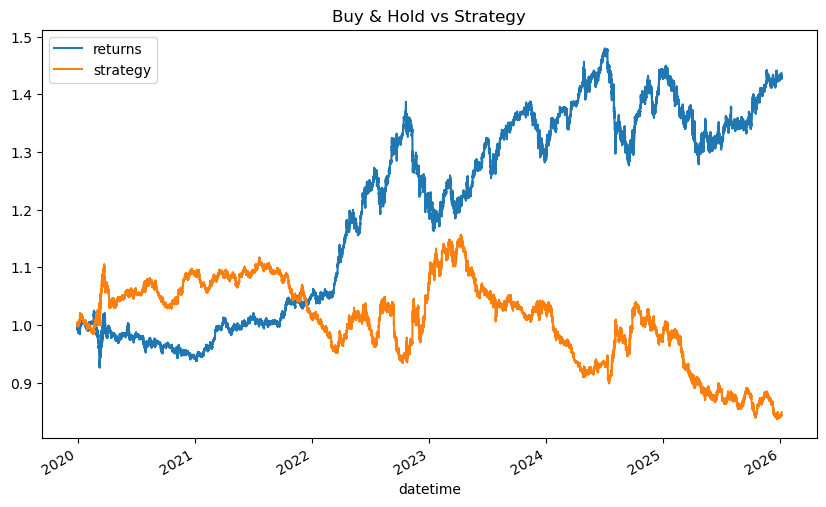

In [108]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6), title='Buy & Hold vs Strategy')